In [1]:
#hopper.ipynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#5 February 2018
#
#hopper uses Q-learning to teach a neural net AI to...

In [68]:
#game settings
max_moves = 100
N_neurons = 128
rn_seed = 14

In [69]:
#import the hopper game
from hopper import *

In [70]:
##build neural network model
#N_inputs = state['cat_xy'].shape[0]
#N_outputs = N_inputs
#model = build_model(N_inputs, N_neurons, N_outputs)
#print model.summary()

In [109]:
#initialize system
rn_seed = 21
max_moves = 100
N_moves = 0
environment = initialize_environment(rn_seed, max_moves)
state = initialize_state(environment)
reward = get_reward(state)
separation = get_separation(state)
game_state = get_game_state(N_moves, environment)
print 'environment = ', environment
print 'state = ', state
print 'reward = ', reward
print 'separation = ', separation
print 'game_state = ', game_state

environment =  {'max_moves': 100, 'rn_seed': 21}
state =  {'bug_xy': array([ 0.,  0.]), 'cat_xy': array([-1.85276335,  0.44460809])}
reward =  0.524834359907
separation =  1.90536305622
game_state =  running


In [110]:
rewards_list = [reward]
separations_list = [separation]
cat_list = [state['cat_xy']]
bug_list = [state['bug_xy']]
while (game_state == 'running'):
    #cat pounces on bug
    cat_xy = state['cat_xy'].copy()
    cat_list += [cat_xy]
    bug_xy = state['bug_xy'].copy()
    bug_list += [bug_xy]
    cat_delta_xy = bug_xy - cat_xy                  #cat tries to pounce on bug
    next_state = update_state(state, cat_delta_xy)
    reward = get_reward(next_state)
    rewards_list += [reward]
    separation = get_separation(next_state)
    separations_list += [separation]
    game_state = get_game_state(N_moves, environment)
    state = copy.deepcopy(next_state)
    N_moves += 1
rewards = np.array(rewards_list)
separations = np.array(separations_list)
turns = np.arange(len(rewards))
cat_xy = np.array(cat_list)
bug_xy = np.array(bug_list)
total_rewards = rewards.sum()
total_separations = separations.sum()
print 'total_rewards = ', total_rewards
print 'total_separations = ', total_separations

total_rewards =  92.1171170928
total_separations =  180.359406396


In [111]:
#import plotting libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5, font='DejaVu Sans')

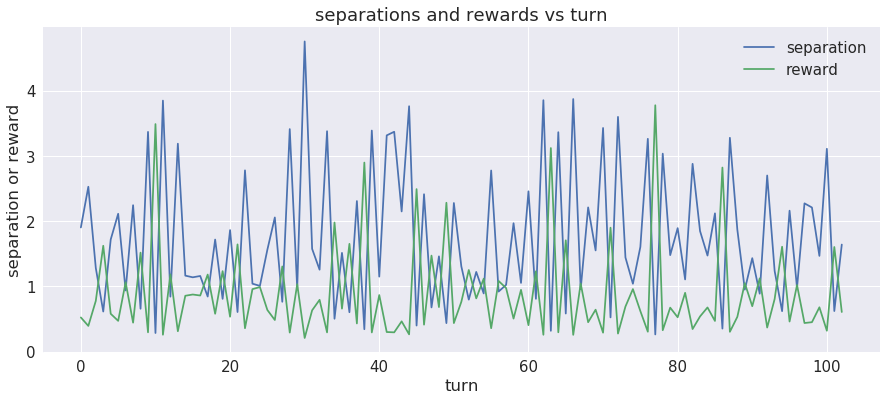

In [112]:
#plot separations and rewards vs turn
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = turns
yp = separations
ax.plot(xp, yp, label='separation')
yp = rewards
ax.plot(xp, yp, label='reward')
ax.set_title('separations and rewards vs turn')
ax.set_ylabel('separation or reward')
ax.set_xlabel('turn')
ax.legend()
plt.savefig('figs/separations.png')

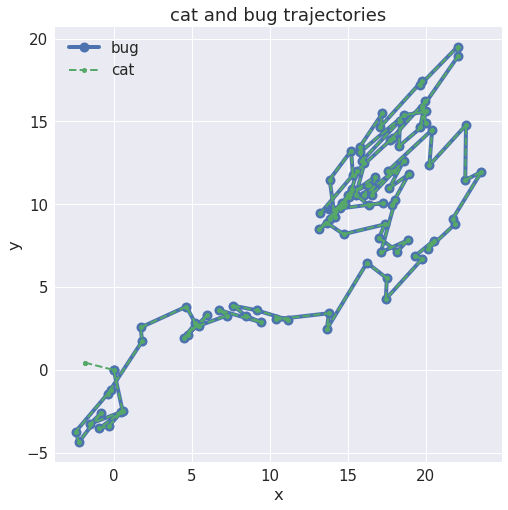

In [113]:
#plot separations and rewards vs turn
fig, ax = plt.subplots(1,1, figsize=(8, 8))
xp = bug_xy[:,0]
yp = bug_xy[:,1]
ax.plot(xp, yp, marker='o', markersize=10, linewidth=4, label='bug')
xp = cat_xy[:,0]
yp = cat_xy[:,1]
ax.plot(xp, yp, marker='o', markersize=5, linestyle='--', linewidth=2, label='cat')
ax.set_title('cat and bug trajectories')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()
plt.savefig('figs/cat_bug_xy.png')

In [108]:
rewards

array([ 0.60877866])